# Wordcloud

In this notebook, we shall create notebooks for the wordcloud for the bot tweets and the human tweets. This is to get a general sense of the type of words used in both kinds of tweets

In [1]:
#import libraries needed for this step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import emoji

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
#Reading in the data
human_tweets = pd.read_csv('human_tweets_processed.csv')

In [4]:
human_tweets.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,text,source,user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,bot,cleaned_text
0,0,0,1555987,549097411394940928,@KyleDavidHall @YouTube YASS THANKS BABE,"<a href=""http://twitter.com/download/iphone"" r...",2.193435e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.0,Sun Dec 28 06:59:59 +0000 2014,0,__user_mention__ __user_mention__ YASS THANKS ...
1,1,1,1585626,566021410649145345,RT @AbnInfVet: ...And Then Bloomberg Says He D...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2.198399e+09,5.660208e+17,11.0,0.0,0.0,3.0,0.0,1.0,Thu Feb 12 23:49:55 +0000 2015,0,RT __user_mention__ ...And Then Bloomberg Says...
2,2,3,1916698,489188089143648256,RT @lgbtqnation: Federal judge considers separ...,"<a href=""http://twitter.com/download/iphone"" r...",2.244691e+09,4.891829e+17,10.0,0.0,0.0,1.0,1.0,1.0,Tue Jul 15 23:21:43 +0000 2014,0,RT __user_mention__ Federal judge considers se...
3,3,5,1269997,494612842679517186,RT @OKFosterWishes: URGENT; Beds needed to get...,"<a href=""http://twitter.com/download/iphone"" r...",1.752381e+07,4.945571e+17,6.0,0.0,0.0,0.0,1.0,1.0,Wed Jul 30 22:37:45 +0000 2014,0,RT __user_mention__ URGENT; Beds needed to get...
4,4,8,2537638,572308471829299200,"RT @luke_brooks: N.America and EU! Our EP ""Wou...","<a href=""http://twitter.com/download/iphone"" r...",2.312113e+08,5.722651e+17,3587.0,0.0,0.0,0.0,1.0,1.0,Mon Mar 02 08:12:27 +0000 2015,0,"RT __user_mention__ N.America and EU! Our EP ""..."


In [5]:
#We shall use the already cleaned tweets for this task
human_tweets_text = human_tweets[['cleaned_text']].copy()

In [6]:
bot_tweets_social = pd.read_csv('bot_tweets_social_processed.csv')

In [7]:
bot_tweets_fake = pd.read_csv('bot_tweets_fake_processed.csv')

In [8]:
bot_tweets_social_text = bot_tweets_social[['cleaned_text']].copy()
bot_tweets_fake_text = bot_tweets_fake[['cleaned_text']].copy()

In [9]:
#First, we shall generate the wordcloud for human users

human_tweets_text['tokenized'] = human_tweets_text['cleaned_text'].apply(word_tokenize)

In [10]:
human_tweets_text.head()

,cleaned_text,tokenized
0,__user_mention__ __user_mention__ YASS THANKS ...,"[__user_mention__, __user_mention__, YASS, THA..."
1,RT __user_mention__ ...And Then Bloomberg Says...,"[RT, __user_mention__, ..., And, Then, Bloombe..."
2,RT __user_mention__ Federal judge considers se...,"[RT, __user_mention__, Federal, judge, conside..."
3,RT __user_mention__ URGENT; Beds needed to get...,"[RT, __user_mention__, URGENT, ;, Beds, needed..."
4,"RT __user_mention__ N.America and EU! Our EP ""...","[RT, __user_mention__, N.America, and, EU, !, ..."


In [41]:
#include the list of stop words and contextual stop words and instantiate a lemmatizer
stop = set(stopwords.words('english'))
contextual_stop = ["__user_mention__", "__hashtag__", "rt", "u", 'r', 't']
lemmatizer = WordNetLemmatizer()

In [42]:
#remove all stop words
human_tweets_text['processed_data'] = human_tweets_text.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word not in contextual_stop])
#perform lemmatization
human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [43]:
#join the processed tokens to form a sentence
human_tweets_text['sentence'] = human_tweets_text['processed_data'].apply(lambda x:' '.join(x))

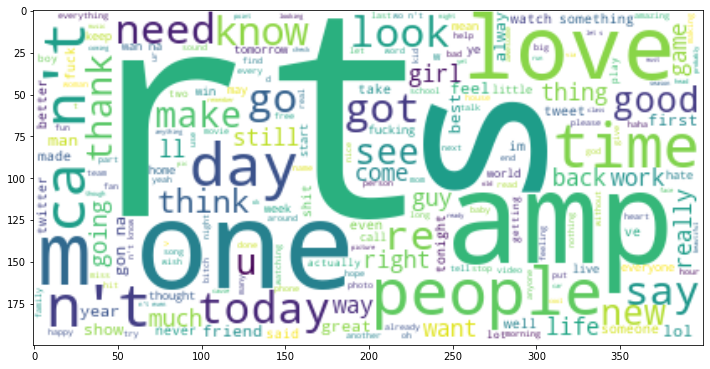

In [44]:
#Create a big sentence for humans joining all human tweets together
big_sentence = ''

for sentence in human_tweets_text['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')

In [45]:
#now we do the same for bots
bot_tweets_text = pd.concat([bot_tweets_social_text, bot_tweets_fake_text], axis = 0)

In [46]:
bot_tweets_text['tokenized'] = bot_tweets_text['cleaned_text'].apply(word_tokenize)

In [47]:
#remove all stop words
bot_tweets_text['processed_data'] = bot_tweets_text.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word not in contextual_stop])
#perform lemmatization
bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [48]:
#join the processed tokens to form a sentence
bot_tweets_text['sentence'] = bot_tweets_text['processed_data'].apply(lambda x:' '.join(x))

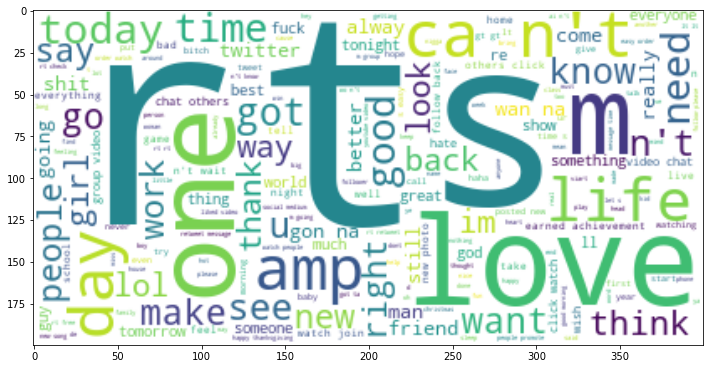

In [49]:
#Create a big sentence for bots joining all bot tweets together
big_sentence = ''

for sentence in bot_tweets_text['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')